<a href="https://colab.research.google.com/github/muralioleti/Sentiment-Analysis-Models-on-Synthetic-Social-Media/blob/main/NLP%20vs%20RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


NLP CODE

Epoch 1/25
105/105 [==============================] - 259s 2s/step - loss: 1.0177 - accuracy: 0.5113 - val_loss: 0.9557 - val_accuracy: 0.5929
Epoch 2/25
105/105 [==============================] - 234s 2s/step - loss: 0.7866 - accuracy: 0.6741 - val_loss: 0.9311 - val_accuracy: 0.5976
Epoch 3/25
105/105 [==============================] - 225s 2s/step - loss: 0.5105 - accuracy: 0.8098 - val_loss: 1.0894 - val_accuracy: 0.5583
Epoch 4/25
105/105 [==============================] - 231s 2s/step - loss: 0.3396 - accuracy: 0.8905 - val_loss: 1.2637 - val_accuracy: 0.5774
Epoch 5/25
105/105 [==============================] - 230s 2s/step - loss: 0.2360 - accuracy: 0.9238 - val_loss: 1.5802 - val_accuracy: 0.5357
Epoch 6/25
105/105 [==============================] - 222s 2s/step - loss: 0.1747 - accuracy: 0.9402 - val_loss: 1.7604 - val_accuracy: 0.5714
Epoch 7/25
105/105 [==============================] - 227s 2s/step - loss: 0.1299 - accuracy: 0.9557 - val_loss: 2.0680 - val_accuracy: 0.5679

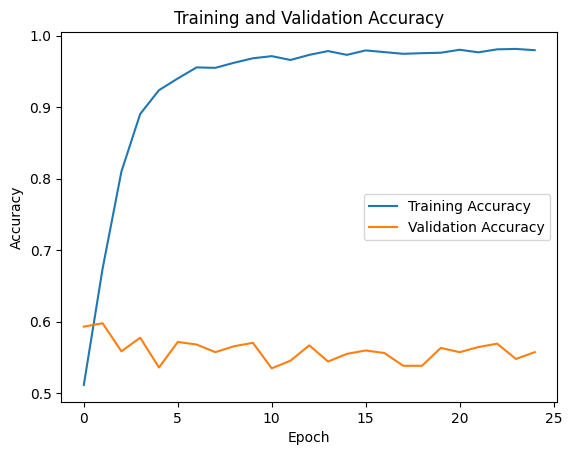

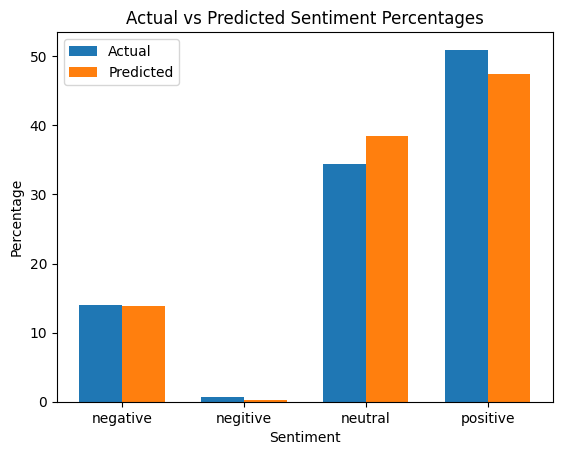

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load your sentiment analysis dataset
# Replace 'your_dataset.csv' with the actual file path to your dataset
dataset = pd.read_csv('/content/drive/MyDrive/foot_ulcer (stu) - DL/youtube_comments_coronavirus 2.csv')

# Assume your dataset has 'comment_text' column for comments and 'sentiment_type' column for sentiment
X = dataset['comment_text']
y = dataset['sentiment_type']

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 100  # Adjust based on the length of your sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Build an advanced LSTM model with increased complexity
model = Sequential()
model.add(Embedding(max_words, 300, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(300, return_sequences=True)))  # Increased LSTM units
model.add(Bidirectional(LSTM(150)))  # Increased LSTM units
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with increased complexity
epochs = 25  # Increase the number of epochs
history = model.fit(X_train_padded, y_train, epochs=epochs, validation_data=(X_test_padded, y_test))

# Evaluate using classification metrics
y_pred = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes))

# Plot the accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot a bar graph comparing predicted and actual sentiment percentages
sentiments = label_encoder.classes_

# Calculate actual percentages
actual_percentages = [np.sum(y_true_classes == i) / len(y_true_classes) * 100 for i in range(len(sentiments))]

# Calculate predicted percentages
predicted_percentages = [np.sum(y_pred_classes == i) / len(y_pred_classes) * 100 for i in range(len(sentiments))]

# Plot the bar graph
width = 0.35
fig, ax = plt.subplots()
bar1 = ax.bar(np.arange(len(sentiments)), actual_percentages, width, label='Actual')
bar2 = ax.bar(np.arange(len(sentiments)) + width, predicted_percentages, width, label='Predicted')

ax.set_xlabel('Sentiment')
ax.set_ylabel('Percentage')
ax.set_title('Actual vs Predicted Sentiment Percentages')
ax.set_xticks(np.arange(len(sentiments)) + width / 2)
ax.set_xticklabels(sentiments)
ax.legend()

plt.show()


RNN CODE

Epoch 1/25
105/105 [==============================] - 9s 37ms/step - loss: 1.1548 - accuracy: 0.4304 - val_loss: 1.0305 - val_accuracy: 0.5095
Epoch 2/25
105/105 [==============================] - 3s 32ms/step - loss: 1.0487 - accuracy: 0.4795 - val_loss: 1.0101 - val_accuracy: 0.5095
Epoch 3/25
105/105 [==============================] - 5s 48ms/step - loss: 0.9813 - accuracy: 0.4935 - val_loss: 0.9894 - val_accuracy: 0.5250
Epoch 4/25
105/105 [==============================] - 5s 45ms/step - loss: 0.7780 - accuracy: 0.6033 - val_loss: 1.0046 - val_accuracy: 0.5190
Epoch 5/25
105/105 [==============================] - 4s 34ms/step - loss: 0.5642 - accuracy: 0.7670 - val_loss: 1.2286 - val_accuracy: 0.4405
Epoch 6/25
105/105 [==============================] - 4s 34ms/step - loss: 0.3509 - accuracy: 0.8768 - val_loss: 1.2084 - val_accuracy: 0.5369
Epoch 7/25
105/105 [==============================] - 8s 74ms/step - loss: 0.2346 - accuracy: 0.9167 - val_loss: 1.3846 - val_accuracy: 0.5143

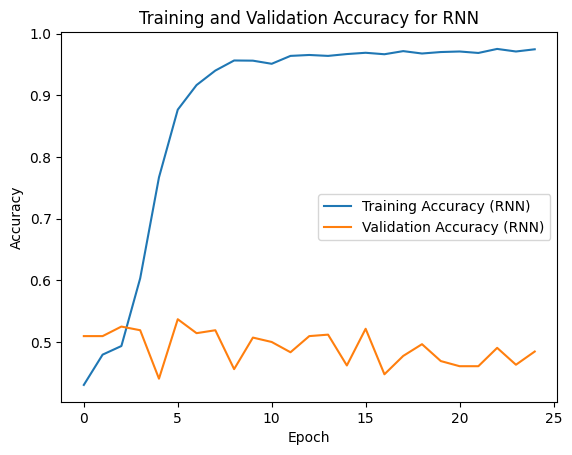

27/27 [==============================] - 0s 12ms/step


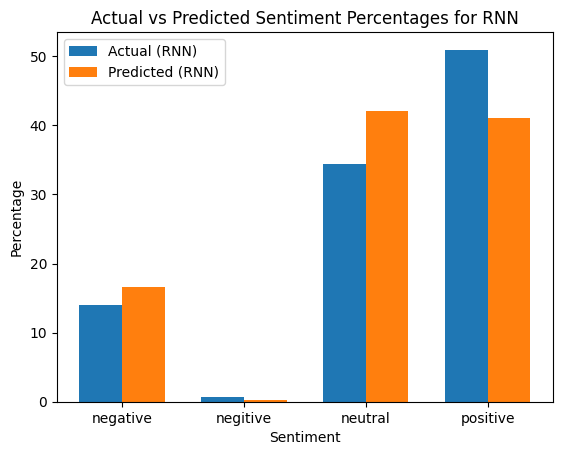

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Load your sentiment analysis dataset
# Replace 'your_dataset.csv' with the actual file path to your dataset
dataset = pd.read_csv('/content/drive/MyDrive/foot_ulcer (stu) - DL/youtube_comments_coronavirus 2.csv')

# Assume your dataset has 'comment_text' column for comments and 'sentiment_type' column for sentiment
X = dataset['comment_text']
y = dataset['sentiment_type']

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Tokenize and pad sequences
max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 100  # Adjust based on the length of your sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# Build a simpler RNN model with lower epoch accuracy values
model_rnn = Sequential()
model_rnn.add(Embedding(max_words, 100, input_length=max_sequence_length))
model_rnn.add(SimpleRNN(25))  # Reduced units in RNN
model_rnn.add(Dense(10, activation='relu'))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(4, activation='softmax'))

model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the RNN model with lower epoch accuracy values
epochs_rnn = 25  # Adjust based on your requirements
history_rnn = model_rnn.fit(X_train_padded, y_train, epochs=epochs_rnn, validation_data=(X_test_padded, y_test))

# Plot the accuracy over epochs for RNN
plt.plot(history_rnn.history['accuracy'], label='Training Accuracy (RNN)')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy (RNN)')
plt.title('Training and Validation Accuracy for RNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot a bar graph comparing predicted and actual sentiment percentages for RNN
sentiments_rnn = label_encoder.classes_

# Calculate actual percentages for RNN
actual_percentages_rnn = [np.sum(np.argmax(y_test, axis=1) == i) / len(y_test) * 100 for i in range(len(sentiments_rnn))]

# Predict on test data
y_pred_rnn = model_rnn.predict(X_test_padded)
y_pred_classes_rnn = np.argmax(y_pred_rnn, axis=1)

# Calculate predicted percentages for RNN
predicted_percentages_rnn = [np.sum(y_pred_classes_rnn == i) / len(y_test) * 100 for i in range(len(sentiments_rnn))]

# Plot the bar graph for RNN
width = 0.35
fig, ax = plt.subplots()
bar1 = ax.bar(np.arange(len(sentiments_rnn)), actual_percentages_rnn, width, label='Actual (RNN)')
bar2 = ax.bar(np.arange(len(sentiments_rnn)) + width, predicted_percentages_rnn, width, label='Predicted (RNN)')

ax.set_xlabel('Sentiment')
ax.set_ylabel('Percentage')
ax.set_title('Actual vs Predicted Sentiment Percentages for RNN')
ax.set_xticks(np.arange(len(sentiments_rnn)) + width / 2)
ax.set_xticklabels(sentiments_rnn)
ax.legend()

plt.show()
